## Movie Ratings Analysis

Analyze a dataset of movie ratings. Perform EDA to find trends in ratings, the distribution of genres, and correlations between different variables. Create visualizations like histograms, scatter plots, and box plots to communicate your findings.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import numpy as np
import ast

In [2]:
# Unzipping the file
with zipfile.ZipFile('Movie Ratings.zip', 'r') as zip_ref:
    zip_ref.extractall('Movie_Ratings')

# Get list of all files in the extracted folder
file_list = os.listdir('Movie_Ratings')

# Load the first CSV file into a DataFrame
csv_file = [file for file in file_list if file.endswith('.csv')][0]
df = pd.read_csv(f'Movie_Ratings/{csv_file}')

# Display the first few rows to inspect the data
print(df.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [3]:
# Initial Data Exploration

# Check the basic information and data types of each column
print("\nData Types and Non-Null Counts:\n")
print(df.info())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# View basic statistics of numerical columns
print("\nSummary Statistics for Numerical Columns:\n")
print(df.describe())

# Display unique values in categorical columns
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicates)}")

# Check for duplicate movie titles if there's a column for 'Title'
if 'Title' in df.columns:
    title_duplicates = df[df['Title'].duplicated()]
    print(f"\nNumber of duplicate movie titles: {len(title_duplicates)}")


Data Types and Non-Null Counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   

In [4]:
# Clean Data

# Handle missing values:
# Drop rows where critical columns like budget, revenue, or vote_average are missing
df.dropna(subset=['budget', 'revenue', 'vote_average'], inplace=True)

# Fill missing values in runtime with the median value
if 'runtime' in df.columns:
    df['runtime'].fillna(df['runtime'].median(), inplace=True)

# Handle columns with JSON-like data, e.g., genres (extract genre names)
def extract_genres(genre_str):
    try:
        genres = json.loads(genre_str.replace("'", "\""))  # Clean JSON-like structure
        return ', '.join([genre['name'] for genre in genres])
    except:
        return np.nan

if 'genres' in df.columns:
    df['genres_cleaned'] = df['genres'].apply(extract_genres)

# Convert columns like 'budget' and 'revenue' to numeric if necessary
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Remove movies with zero budget or revenue (likely incorrect data)
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

# Add a column for profit (revenue - budget)
df['profit'] = df['revenue'] - df['budget']

# Convert release_date to datetime
if 'release_date' in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract year from the release date
if 'release_date' in df.columns:
    df['release_year'] = df['release_date'].dt.year

# Drop columns that are unlikely to be used for analysis
# Only drop columns that exist in the DataFrame
columns_to_drop = ['homepage', 'tagline', 'overview', 'poster_path', 'status', 'keywords', 'spoken_languages']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

df.drop(columns=['genres_cleaned'], inplace=True)

# Display cleaned data information
print("\nCleaned Dataset Info:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Save cleaned dataset to a new CSV file in the current directory
cleaned_file_path = 'cleaned_movies_dataset.csv'  # Save to the current directory
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}")


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3229 entries, 0 to 4798
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3229 non-null   int64         
 1   genres                3229 non-null   object        
 2   id                    3229 non-null   int64         
 3   original_language     3229 non-null   object        
 4   original_title        3229 non-null   object        
 5   popularity            3229 non-null   float64       
 6   production_companies  3229 non-null   object        
 7   production_countries  3229 non-null   object        
 8   release_date          3229 non-null   datetime64[ns]
 9   revenue               3229 non-null   int64         
 10  runtime               3229 non-null   float64       
 11  title                 3229 non-null   object        
 12  vote_average          3229 non-null   float64       
 13  

C:\Users\milto\AppData\Local\Temp\ipykernel_9076\2532762664.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['runtime'].fillna(df['runtime'].median(), inplace=True)


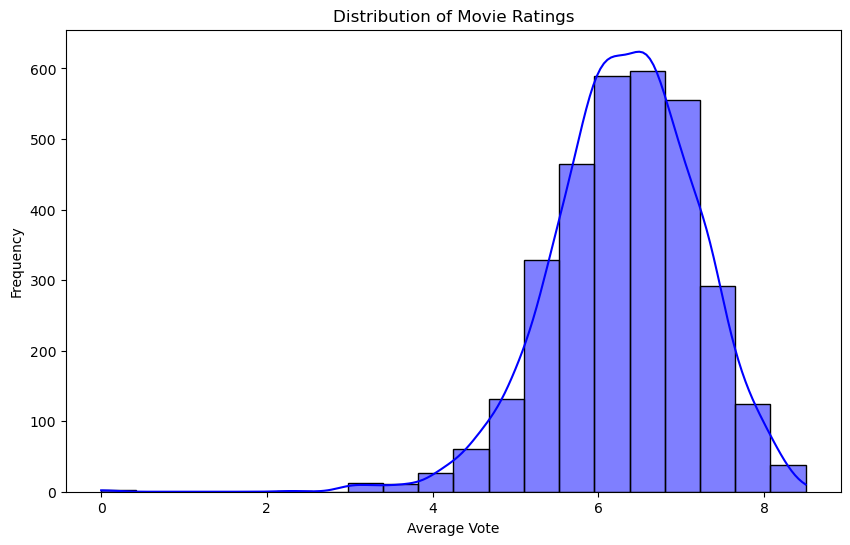

In [5]:
# Visualization

plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=20, kde=True, color='blue')
plt.xlabel('Average Vote')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

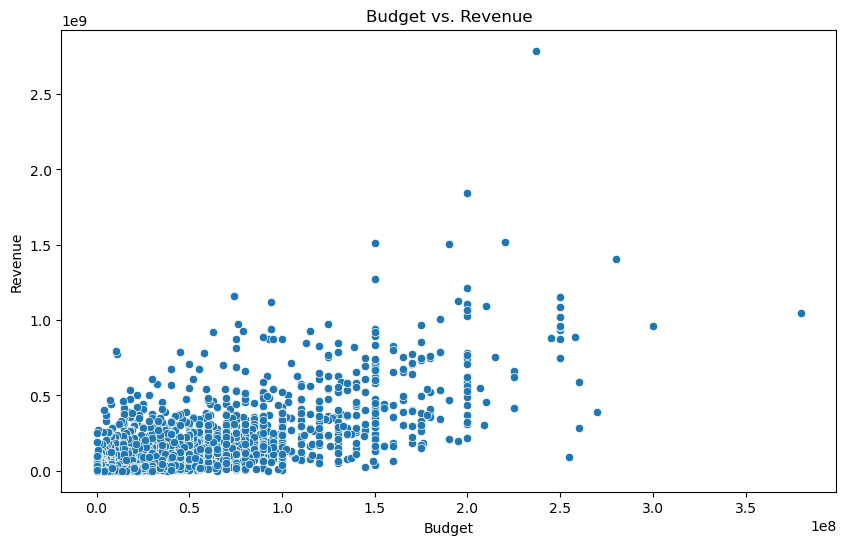

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue')
plt.show()

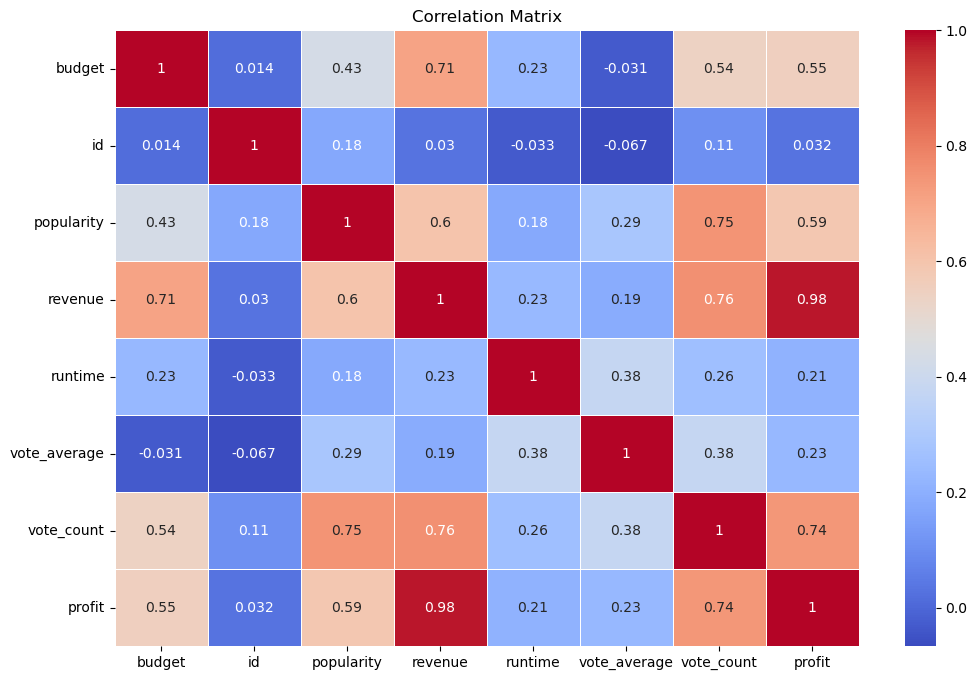

In [7]:
# Select only numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
correlation_matrix

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit
budget,1.000000,0.013624,0.431990,0.705399,0.229490,-0.031208,0.540165,0.550252
id,0.013624,1.000000,0.177854,0.030112,-0.033430,-0.067064,0.106880,0.031648
popularity,0.431990,0.177854,1.000000,0.602246,0.182198,0.286994,0.749088,0.588190
revenue,0.705399,0.030112,0.602246,1.000000,0.233074,0.187839,0.756210,0.980003
runtime,0.229490,-0.033430,0.182198,0.233074,1.000000,0.378641,0.257922,0.210144
vote_average,-0.031208,-0.067064,0.286994,0.187839,0.378641,1.000000,0.377658,0.230041
vote_count,0.540165,0.106880,0.749088,0.756210,0.257922,0.377658,1.000000,0.739198
profit,0.550252,0.031648,0.588190,0.980003,0.210144,0.230041,0.739198,1.000000


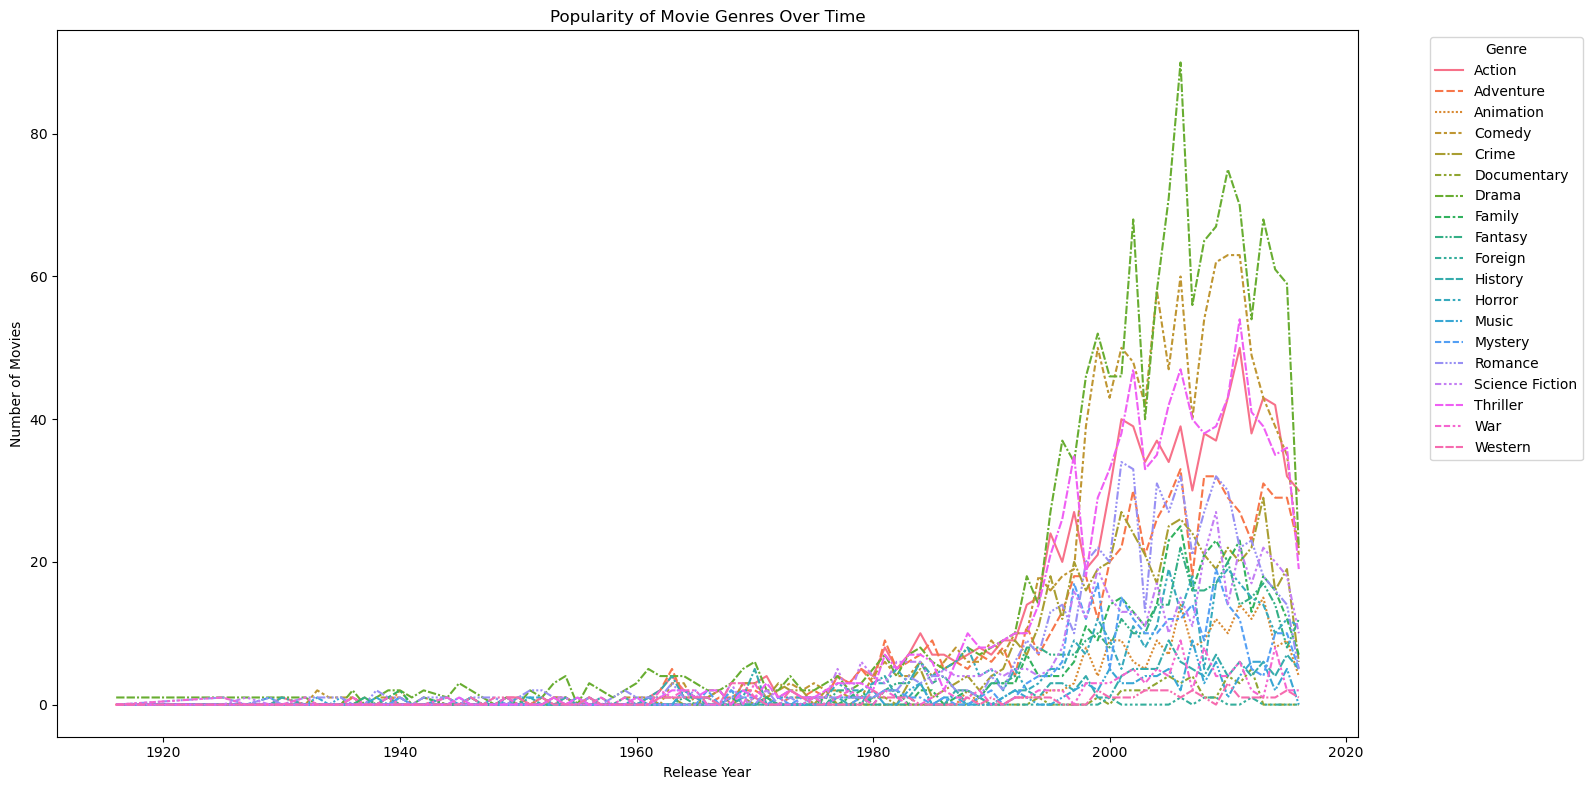

In [8]:
# Additional Analysis Code

# Ensure 'genres' contains valid lists
def parse_genres(x):
    if isinstance(x, str):
        try:
            # Try to evaluate if it's a string representation of a list or dictionary
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            # If evaluation fails, return an empty list or handle the error appropriately
            return []
    elif isinstance(x, list):
        # If it's already a list, return it as-is
        return x
    return []

# Apply the function to the 'genres' column
df['genres'] = df['genres'].apply(parse_genres)

# Extract genre names from dictionaries (if genres are stored as dictionaries in lists)
df['genre_list'] = df['genres'].apply(lambda genre: [g['name'] for g in genre if isinstance(g, dict)])

# Explode 'genre_list' to create multiple rows per movie for each genre
df_exploded = df.explode('genre_list')

# Group data by release year and genre to count the number of movies in each genre per year
genre_trends = df_exploded.groupby(['release_year', 'genre_list']).size().reset_index(name='Count')

# Pivot the data to make it suitable for a line plot
genre_pivot = genre_trends.pivot(index='release_year', columns='genre_list', values='Count').fillna(0)

# Plot genre popularity over time
plt.figure(figsize=(16, 8))
sns.lineplot(data=genre_pivot)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Popularity of Movie Genres Over Time')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_9076\1999827327.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_companies, x='production_company_list', y='revenue', palette='viridis')


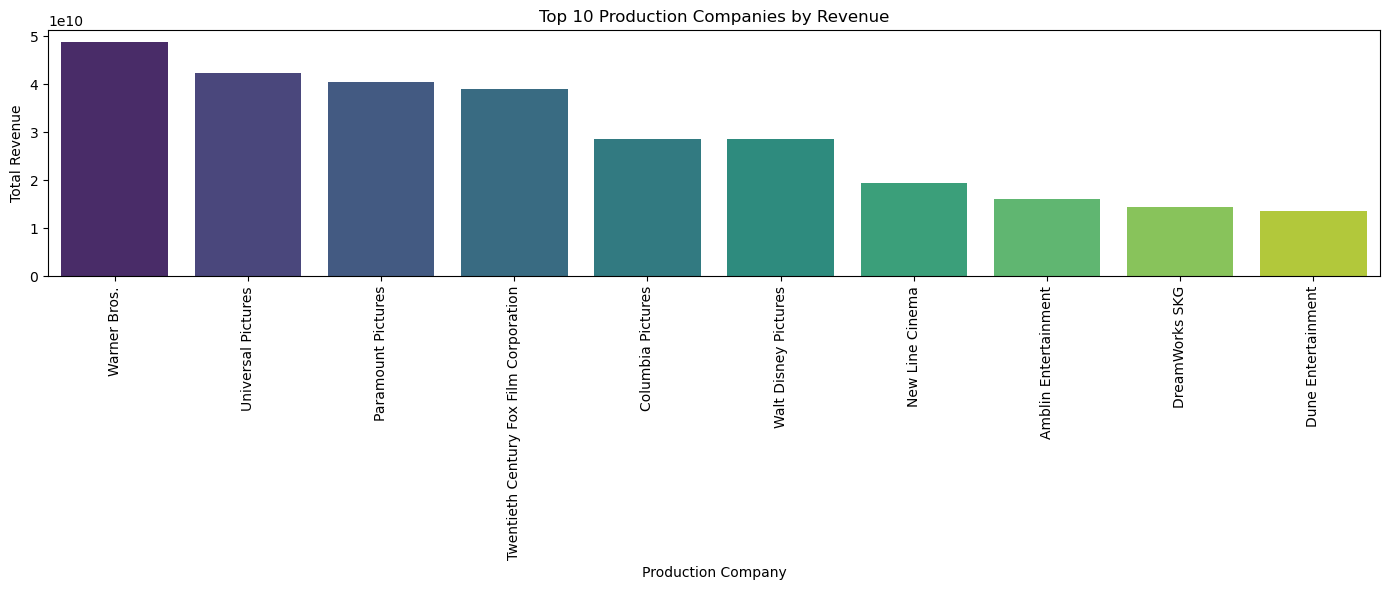

In [9]:
# Parse 'production_companies' as lists of dictionaries
df['production_companies'] = df['production_companies'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Extract production company names
df['production_company_list'] = df['production_companies'].apply(lambda x: [comp['name'] for comp in x])

# Explode the production company list to create multiple rows for each production company
df_companies = df.explode('production_company_list')

# Group by production company and calculate total revenue
top_companies = df_companies.groupby('production_company_list')['revenue'].sum().reset_index()
top_companies = top_companies.sort_values(by='revenue', ascending=False).head(10)

# Plot the top production companies by revenue
plt.figure(figsize=(14, 6))
sns.barplot(data=top_companies, x='production_company_list', y='revenue', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Production Company')
plt.ylabel('Total Revenue')
plt.title('Top 10 Production Companies by Revenue')
plt.tight_layout()
plt.show()

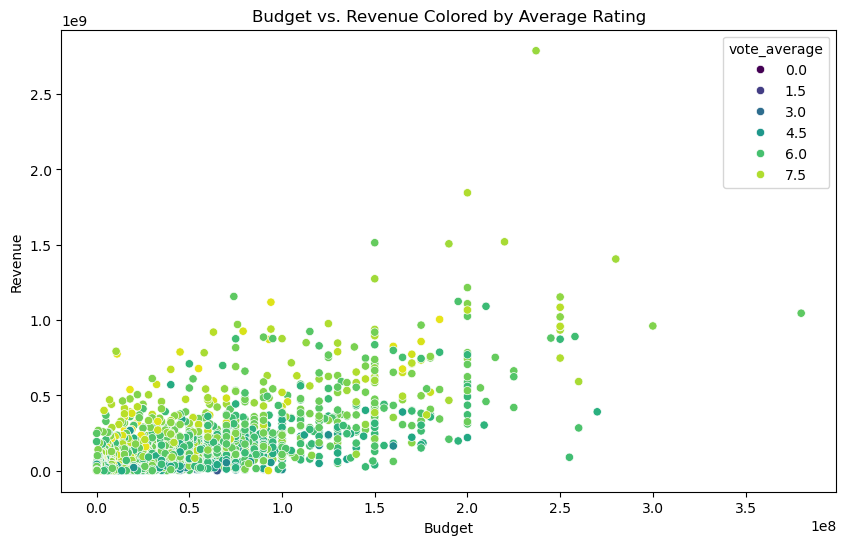

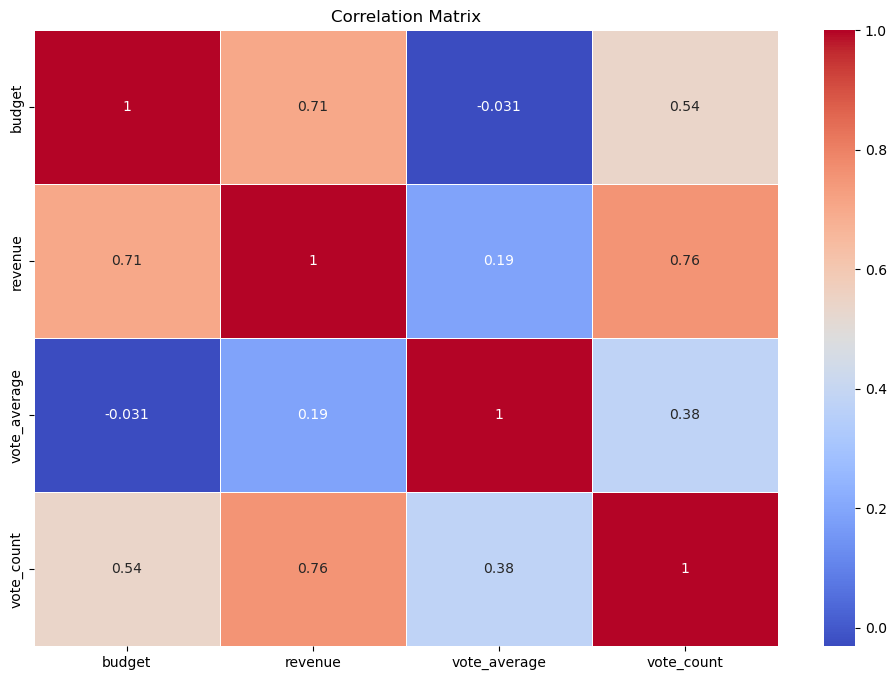

In [10]:
# Scatter plot: Budget vs. Revenue colored by rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', hue='vote_average', palette='viridis')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue Colored by Average Rating')
plt.show()

# Check correlation between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df[['budget', 'revenue', 'vote_average', 'vote_count']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_9076\3479174985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_genre, x='genre_list', y='vote_average', palette='magma')


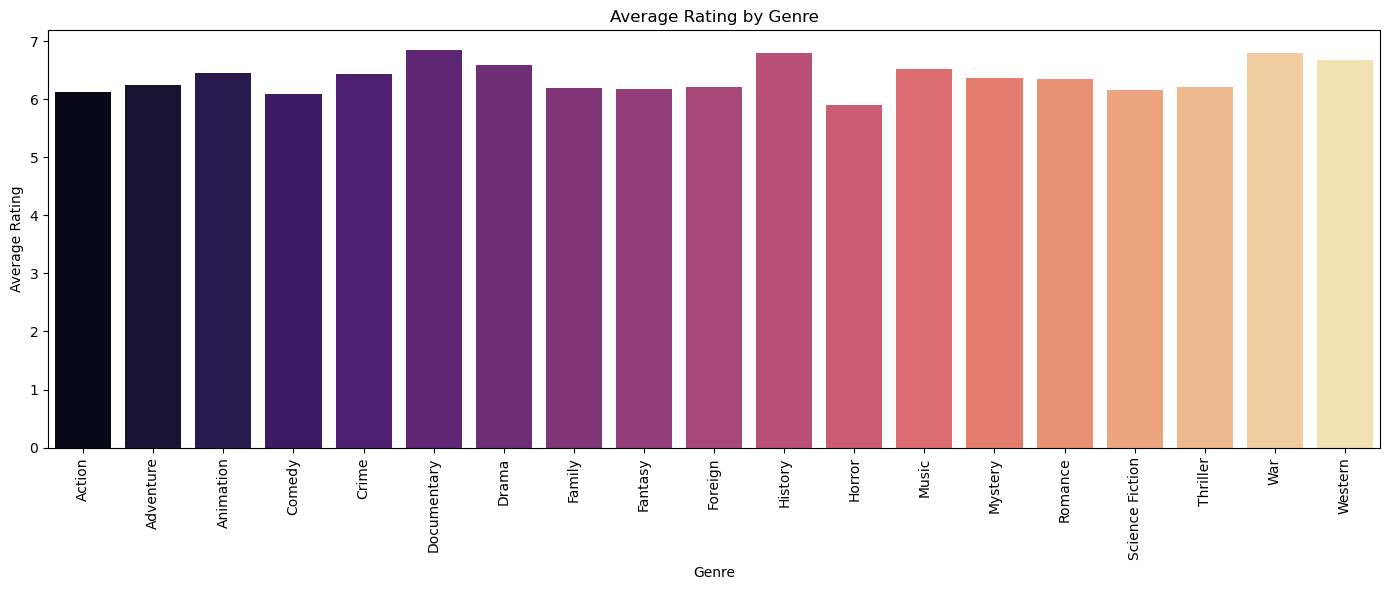

In [11]:
# Group by genre and calculate average rating
average_rating_by_genre = df_exploded.groupby('genre_list')['vote_average'].mean().reset_index()

# Plot average rating by genre
plt.figure(figsize=(14, 6))
sns.barplot(data=average_rating_by_genre, x='genre_list', y='vote_average', palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.tight_layout()
plt.show()

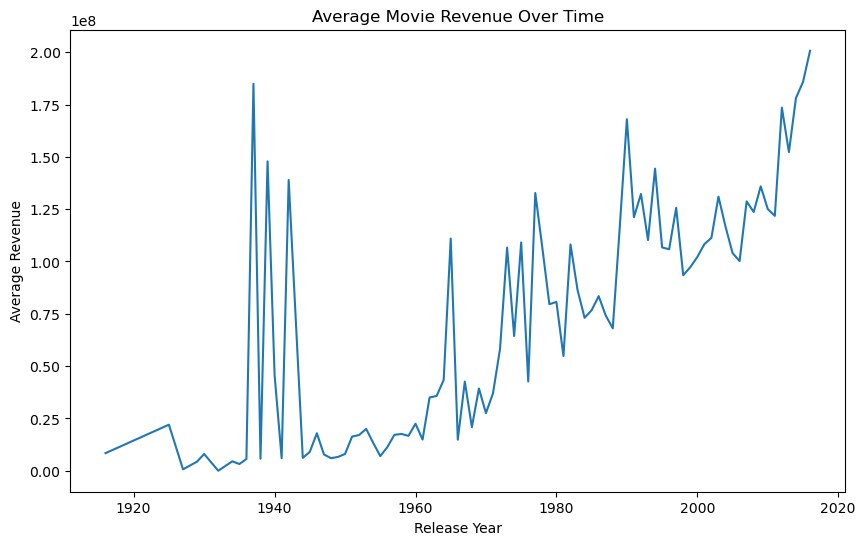

In [12]:
# Group by release year and calculate average revenue
average_revenue_per_year = df.groupby('release_year')['revenue'].mean().reset_index()

# Plot average revenue per year
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_revenue_per_year, x='release_year', y='revenue')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue')
plt.title('Average Movie Revenue Over Time')
plt.show()